In [16]:
import torch

In [17]:
PATH = "temp/model_20.pth.tar"

In [18]:
chp = torch.load(PATH, weights_only=False, map_location='cpu')
weights = chp['model_state_dict']


In [19]:
weights.get('resblock3.3.bn3.running_mean'), weights.get('resblock3.3.bn3.running_var')

(tensor([0.4119, 0.1896, 0.4939,  ..., 0.2549, 0.2278, 0.3917]),
 tensor([0.7700, 0.7178, 0.7028,  ..., 0.7449, 0.6198, 0.7008]))

In [20]:
fc_weights = weights.get("classifier.weight")

fc_model = fc_weights[:, :2048]
fc_hog = fc_weights[:, 2048:]

In [21]:
net_mean, net_std, net_min, net_max = fc_model.mean(), fc_model.std(), fc_model.min(), fc_model.max()
hog_mean, hog_std, hog_min, hog_max = fc_hog.mean(), fc_hog.std(), fc_hog.min(), fc_hog.max()

print(net_max, net_min, hog_max, hog_min)

print(f"Net width: {net_max - net_min:.3f}, Net mean: {net_mean:.3f}, Net std: {net_std:.3f}")
print(f"HOG width: {hog_max - hog_min:.3f}, HOG mean: {hog_mean:.3f}, HOG std: {hog_std:.3f}")


tensor(0.0763) tensor(-0.1897) tensor(0.0552) tensor(-0.0974)
Net width: 0.266, Net mean: -0.010, Net std: 0.028
HOG width: 0.153, HOG mean: -0.002, HOG std: 0.016


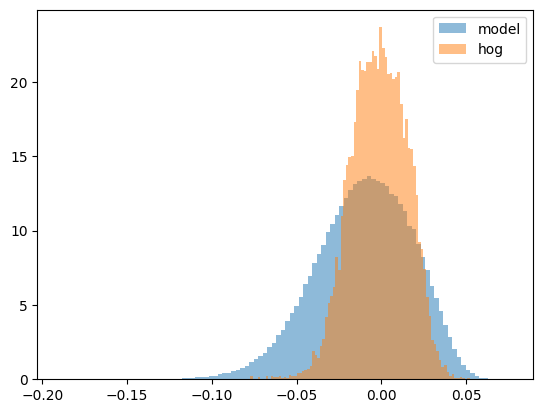

In [22]:
import matplotlib.pyplot as plt

plt.hist(fc_model.flatten(), bins=100, density=True, alpha=0.5, label='model')
plt.hist(fc_hog.flatten(), bins=100, density=True, alpha=0.5, label='hog')
plt.legend()
plt.show()

In [23]:
fc_hog_scaled = (fc_hog - net_min) * (net_max - net_min) + net_min

scaled_hog_min, scaled_hog_max, scaled_hog_mean, scaled_hog_std = fc_hog_scaled.min(), fc_hog_scaled.max(), fc_hog_scaled.mean(), fc_hog_scaled.std()
print(f"Scaled HOG width: {scaled_hog_max - scaled_hog_min:.3f}, Scaled HOG mean: {scaled_hog_mean:.3f}, Scaled HOG std: {scaled_hog_std:.3f}")

Scaled HOG width: 0.041, Scaled HOG mean: -0.140, Scaled HOG std: 0.004


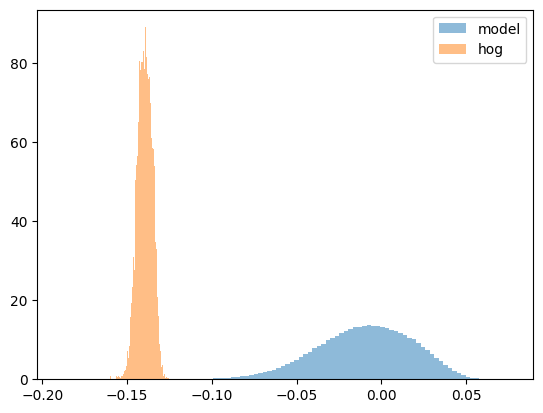

In [24]:
import matplotlib.pyplot as plt

plt.hist(fc_model.flatten(), bins=100, density=True, alpha=0.5, label='model')
plt.hist(fc_hog_scaled.flatten(), bins=100, density=True, alpha=0.5, label='hog')
plt.legend()
plt.show()

In [25]:
bn_mod = torch.nn.BatchNorm1d(2048)
bn_hog = torch.nn.BatchNorm1d(81)

In [26]:
norm_model = bn_mod(fc_weights[:, :2048]).detach()
norm_hog = bn_hog(fc_weights[:, 2048:]).detach()

In [27]:
norm_model.shape, norm_hog.shape

(torch.Size([161, 2048]), torch.Size([161, 81]))

In [28]:
net_mean, net_std, net_min, net_max = norm_model.mean(), norm_model.std(), norm_model.min(), norm_model.max()
hog_mean, hog_std, hog_min, hog_max = norm_hog.mean(), norm_hog.std(), norm_hog.min(), norm_hog.max()

print(net_max, net_min, hog_max, hog_min)

print(f"Net width: {net_max - net_min:.3f}, Net mean: {net_mean:.3f}, Net std: {net_std:.3f}")
print(f"HOG width: {hog_max - hog_min:.3f}, HOG mean: {hog_mean:.3f}, HOG std: {hog_std:.3f}")

tensor(3.1515) tensor(-5.3475) tensor(3.3352) tensor(-5.5828)
Net width: 8.499, Net mean: -0.000, Net std: 0.994
HOG width: 8.918, HOG mean: 0.000, HOG std: 0.982


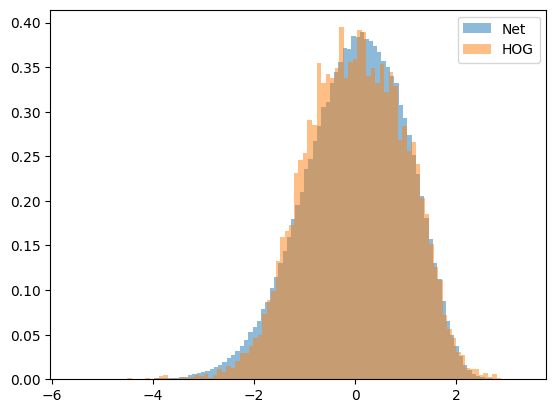

In [29]:
import matplotlib.pyplot as plt

plt.hist(norm_model.flatten(), density=True, bins=100, alpha=0.5, label='Net')
plt.hist(norm_hog.flatten(), density=True, bins=100, alpha=0.5, label='HOG')
plt.legend(loc='upper right')
plt.show()